### Admixture Analyse 


Suite au filtrage LD avec les 601 945 SNPs, il est obtenu 590 724 SNPs qui ont donc subit un filtrage LD indirectement, en effet puisqu'ils sont matchés avec des SNPs déjà filtrés par LD=0.3 on considère que ceux la aussi aurait aussi "passer" le filtre LD=0.3 



On va donc utiliser Plink pour obtenir le .bed necessaire à l'Admixture

Ensuite on doit changer les noms de chromosomes en chiffres car Admixture accepte seulement les noms de chromosomes humains. Pour cela on passe les noms de chromosome en chiffres de 1 à 16 

Enfin on effectue l'Admixture



Pour cela, on lance le script Admixture.sh :



```bash
#!/bin/sh 

#Chargement des modules

module load -f /home/agirardon/work/seqapipopOnHAV3_1/program_module/module

#Variables

VCF=/home/agirardon/work/seqapipopOnHAV3_1/combineGVCFs/LesVCF/Concatenate/outisecautresens/MetaGenotypesCalled403_raw_snps_filtre_isec_plink.vcf.gz 
OUT=SeqApiPop403

# Generer les input file dans le format plink

plink --vcf $VCF --allow-extra-chr --make-bed --out $OUT \

# ADMIXTURE accept pas les noms de chromosome qui ne sont pas humains donc on change les noms de chromosomes par chiffre de 1 à 16 

sed -i -e 's/NC_037638.1/1/g' $OUT.bim 
sed -i -e 's/NC_037639.1/2/g' $OUT.bim
sed -i -e 's/NC_037640.1/3/g' $OUT.bim
sed -i -e 's/NC_037641.1/4/g' $OUT.bim
sed -i -e 's/NC_037642.1/5/g' $OUT.bim
sed -i -e 's/NC_037643.1/6/g' $OUT.bim
sed -i -e 's/NC_037644.1/7/g' $OUT.bim
sed -i -e 's/NC_037645.1/8/g' $OUT.bim
sed -i -e 's/NC_037646.1/9/g' $OUT.bim
sed -i -e 's/NC_037647.1/10/g' $OUT.bim
sed -i -e 's/NC_037648.1/11/g' $OUT.bim
sed -i -e 's/NC_037649.1/12/g' $OUT.bim
sed -i -e 's/NC_037650.1/13/g' $OUT.bim
sed -i -e 's/NC_037651.1/14/g' $OUT.bim
sed -i -e 's/NC_037652.1/15/g' $OUT.bim
sed -i -e 's/NC_037653.1/16/g' $OUT.bim




#ADMIXTURE

for K in {2..16}
do
	admixture --cv  $OUT.bed $K > log${K}.out
	
done

```

Plusieurs fichiers sont donc obtenues : 

- Les logX.out contenant la valeur de CV  
- les SeqApiPop403.X.Q contenant la Q matrix servant pour ploter l'Admixture

Pour identifier la meilleure valeur de k clusters, correspondant à la valeur de cross validation la plus faible, on collecte les CV errors grâce au script:  ObtainCVerror.sh

```bash
#!/bin/bash

#obtainCVerrorAllSeqApiPop.bash


grep CV log* | \
    awk -v var="$i" 'BEGIN{OFS="\t"}{print $3,$4, var}' | \
    sed 's/(K=//' | \
    sed 's/)://' | \
    awk 'BEGIN{FS="_";OFS="\t"}{print $1,$4,$3}' | \
    awk 'BEGIN{OFS="\t"}{print $1,$2,$4,$5}' > CV_error
```

On a donc toutes les valeurs de CVerror :

```bash
less CV_error
```

```
10      0.47957         
11      0.48664         
2       0.50381         
3       0.49099         
4       0.48733         
5       0.48134         
6       0.47882         
7       0.47483         
8       0.47760         
9       0.47784   
```

On va donc maintenant pouvoir ploter les CV errors :



In [65]:
setwd("/home/avignal/Stage_M2/Admixture")

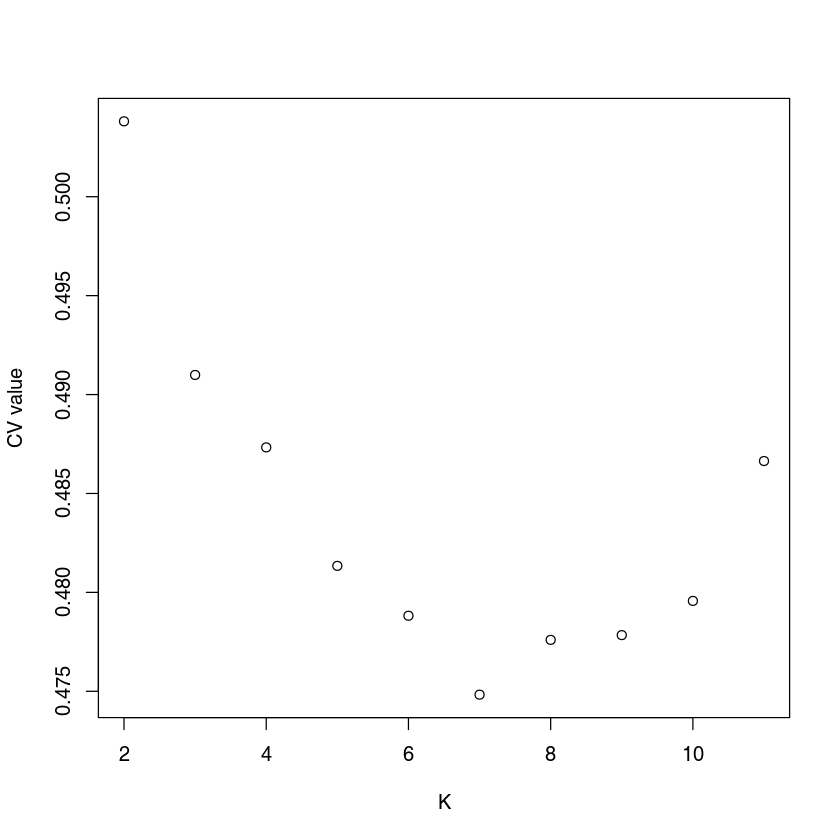

In [67]:
CV_error=read.table('CV_error')

plot((CV_error),  xlab="K",
        ylab="CV value")

Maintenant on va donc ploter l'admixture grâce à 'pong': 

```bash
pong -m /home/avignal/Stage_M2/Admixture/Q_file_K2K12_1r -i /home/avignal/Stage_M2/Admixture/Sorted_SeqApiPop403.list -n /home/avignal/Stage_M2/Admixture/couleur_sort_individu
```

m utilise le fichier Q_file_K2K12_1r : 

```
SeqApiPop403_2_Q	2	/home/avignal/Stage_M2/Admixture/SeqApiPop403.2.Q
SeqApiPop403_3_Q	3	/home/avignal/Stage_M2/Admixture/SeqApiPop403.3.Q
SeqApiPop403_4_Q	4	/home/avignal/Stage_M2/Admixture/SeqApiPop403.4.Q
SeqApiPop403_5_Q	5	/home/avignal/Stage_M2/Admixture/SeqApiPop403.5.Q
SeqApiPop403_6_Q	6	/home/avignal/Stage_M2/Admixture/SeqApiPop403.6.Q
SeqApiPop403_7_Q	7	/home/avignal/Stage_M2/Admixture/SeqApiPop403.7.Q
SeqApiPop403_8_Q	8	/home/avignal/Stage_M2/Admixture/SeqApiPop403.8.Q
SeqApiPop403_9_Q	9	/home/avignal/Stage_M2/Admixture/SeqApiPop403.9.Q
SeqApiPop403_10_Q	10	/home/avignal/Stage_M2/Admixture/SeqApiPop403.10.Q
SeqApiPop403_11_Q	11	/home/avignal/Stage_M2/Admixture/SeqApiPop403.11.Q
SeqApiPop403_12_Q	12	/home/avignal/Stage_M2/Admixture/SeqApiPop403.12.Q
```

i utilise le fichier Sorted_SeqApiPop403.list :

```
Ab-PacBio 
AOC10 
AOC11 
AOC12 
AOC14 
AOC15 
AOC16 
...
YC3 
YC4 
YC5 
YC6 
YC7 
YC8 
YC9 
```

n utilise le fichier couleur_sort_individu :

```
b-PacBio	Mellifera
AOC10	CorseAnciennes
AOC11	CorseAnciennes
AOC12	CorseAnciennes
AOC14	CorseAnciennes
AOC15	CorseAnciennes
AOC16	CorseAnciennes
...
YC3	Ligustica.RoyalJelly.Carnica
YC4	Ligustica.RoyalJelly.Carnica
YC5	Ligustica.RoyalJelly.Carnica
YC6	Ligustica.RoyalJelly.Carnica
YC7	Ligustica.RoyalJelly.Carnica
YC8	Ligustica.RoyalJelly.Carnica
YC9	Ligustica.RoyalJelly.Carnica
```

Cela nous permet de renvoyé en sortie les plots suivants:

![mainviz_2022-1-18_14h56m37s_pong.png](attachment:mainviz_2022-1-18_14h56m37s_pong.png)
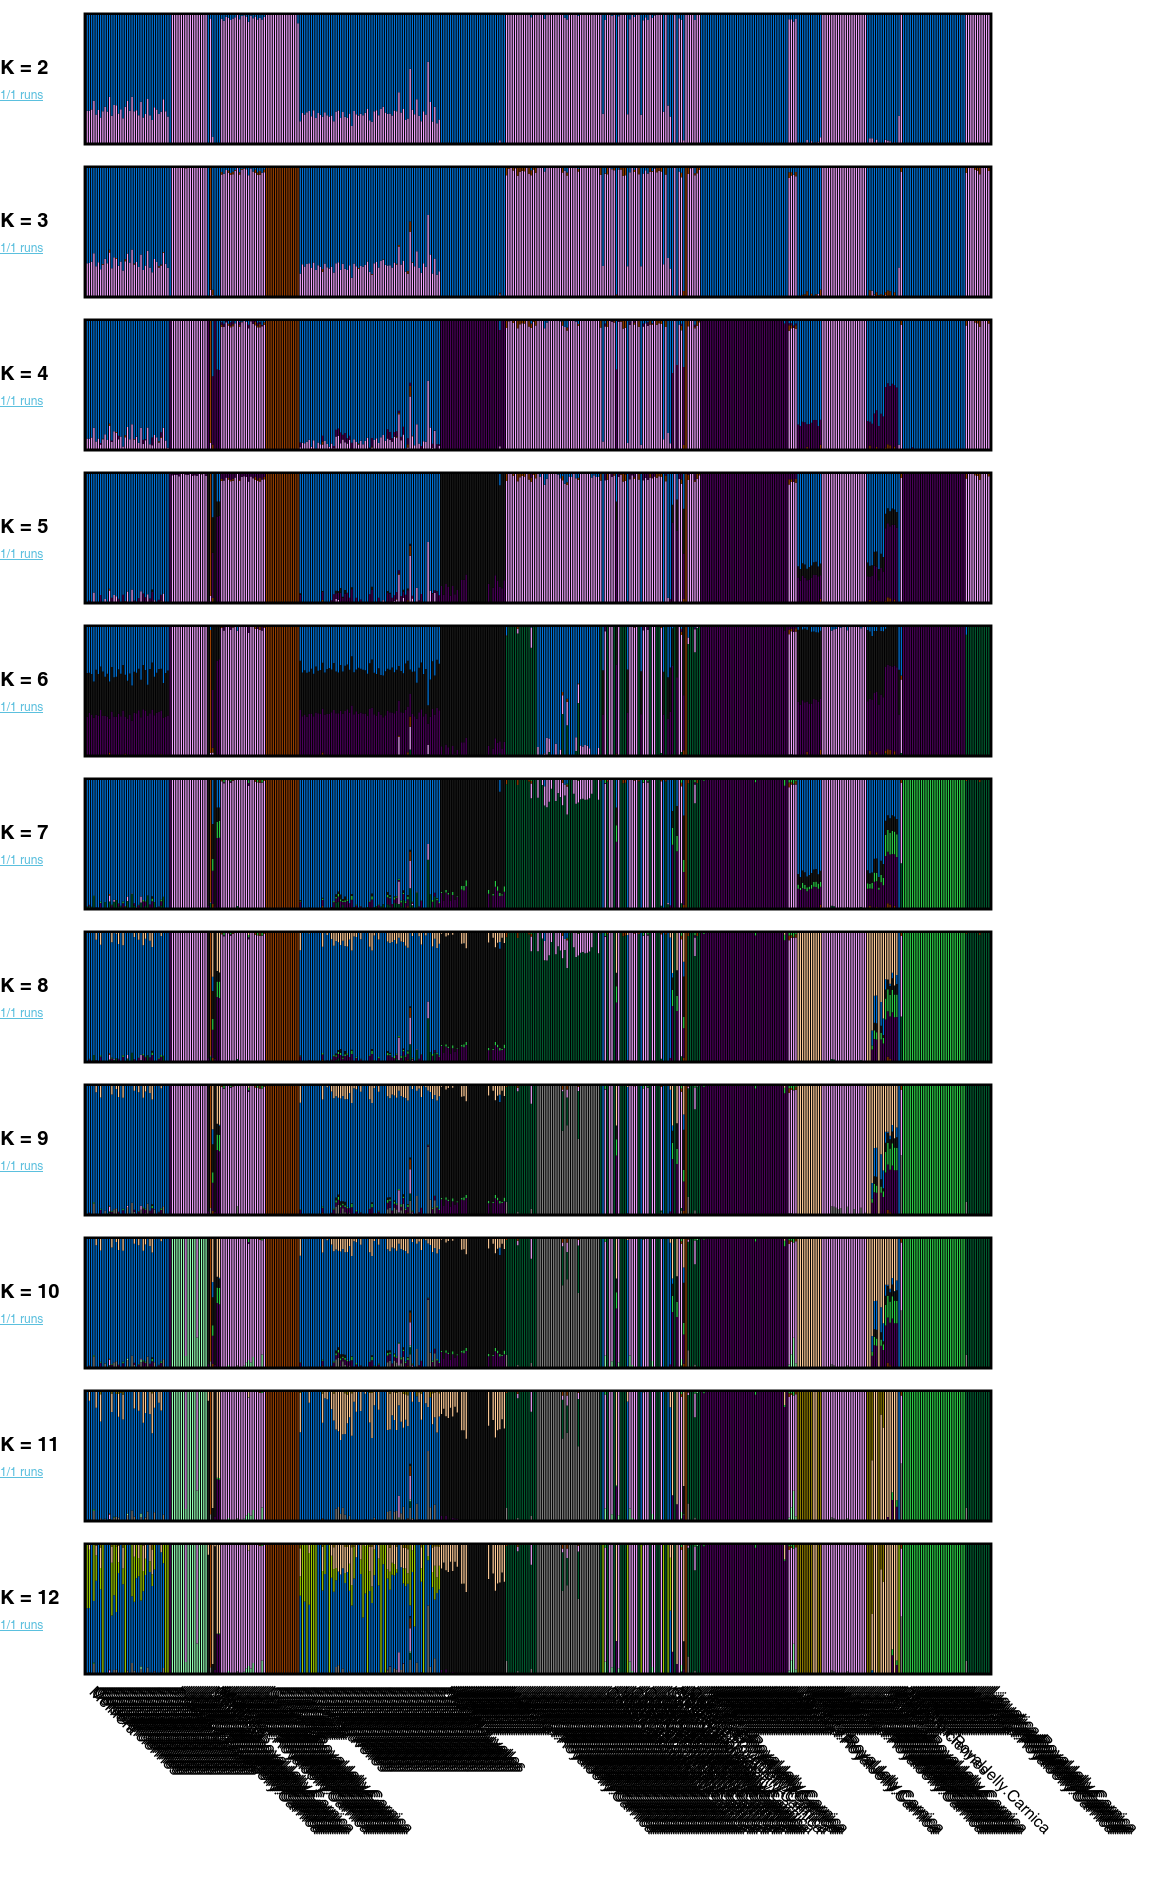